In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv("mosquito_dataset_2017_2024.csv")

In [3]:
df.shape

(2922, 9)

In [4]:
# Display the updated DataFrame
display(df.head())

,Date,Temperature,Rainfall,WaterContent,Month,Season,Rainfall_7d_avg,WaterContent_7d_avg,PremiseIndex
0,2017-01-01,29.80,8.93,37.90,1,Wet,8.93,37.90,6.57
1,2017-01-02,28.88,8.04,12.95,1,Wet,8.48,25.42,2.15
2,2017-01-03,27.20,8.47,25.22,1,Wet,8.48,25.36,4.20
3,2017-01-04,27.25,11.94,51.93,1,Wet,9.34,32.00,8.77
4,2017-01-05,28.05,8.15,40.49,1,Wet,9.11,33.70,5.60


In [5]:
# Check missing values

print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Date                   0
Temperature            0
Rainfall               0
WaterContent           0
Month                  0
Season                 0
Rainfall_7d_avg        0
WaterContent_7d_avg    0
PremiseIndex           0
dtype: int64


In [6]:
df.describe()

,Temperature,Rainfall,WaterContent,Month,Rainfall_7d_avg,WaterContent_7d_avg,PremiseIndex
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,25.998152,19.281362,45.427361,6.522930,19.262488,45.403395,8.833316
std,2.990464,11.174309,13.474198,3.449293,8.834198,8.362202,3.262063
min,18.610000,0.210000,0.400000,1.000000,3.290000,23.780000,0.000000
25%,23.340000,10.332500,36.150000,4.000000,10.830000,38.970000,6.272500
50%,26.015000,18.565000,45.225000,7.000000,18.550000,44.805000,8.700000
75%,28.600000,26.945000,54.380000,10.000000,27.870000,52.050000,11.287500
max,32.980000,68.470000,90.150000,12.000000,40.760000,68.780000,20.000000


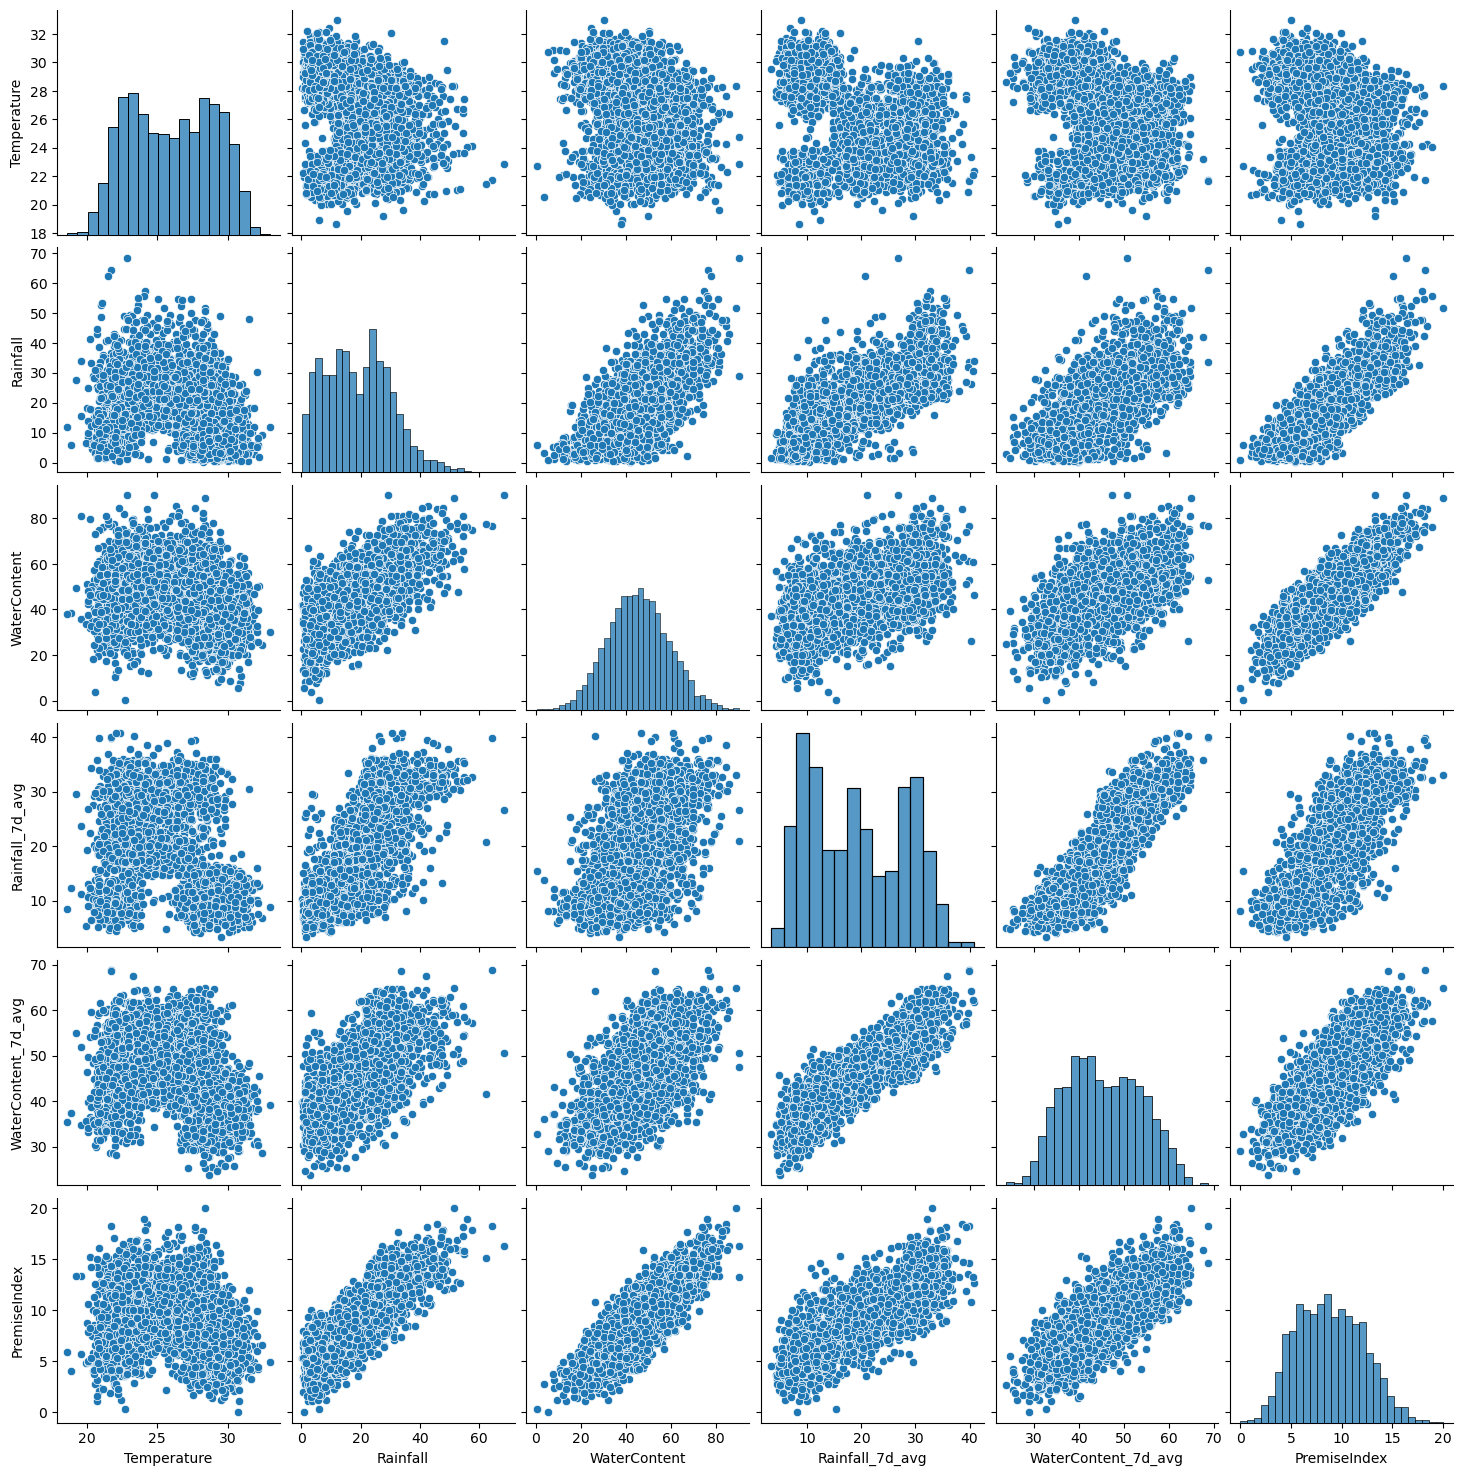

In [7]:
# Pairplot (to see relationships)

sns.pairplot(df[["Temperature", "Rainfall", "WaterContent", 
                 "Rainfall_7d_avg", "WaterContent_7d_avg", "PremiseIndex"]])
plt.show()

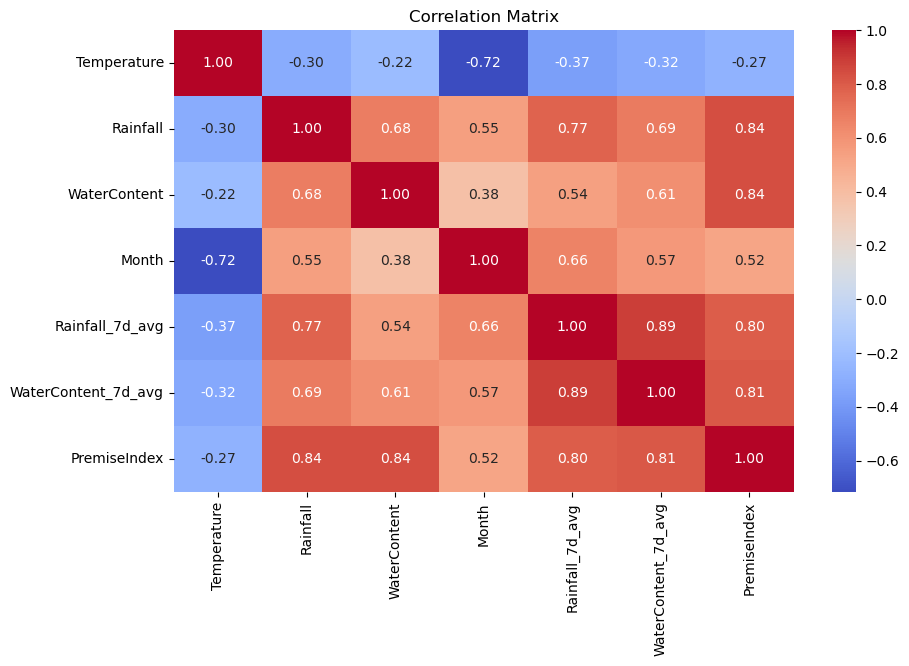

In [8]:
# Select only numerical columns
num_df = df.select_dtypes(include="number")

# Correlation Matrix
plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [9]:
# Feature Selection (X, y)

# Drop non-numeric or unnecessary columns
X = df[["Temperature", "Rainfall", "WaterContent", 
        "Rainfall_7d_avg", "WaterContent_7d_avg"]]
y = df["PremiseIndex"]

In [10]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [11]:
# Train Model with n_estimators (Random Forest)

model = RandomForestRegressor(n_estimators=200, random_state=42)  # try 100, 200, 500
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [12]:
# 7. Hyperparameter Tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Base model
rf = RandomForestRegressor(random_state=42)

# Random grid of hyperparameters
random_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],  
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [13]:
# Random search of parameters
# - 5-fold cross validation
# - 10 different combinations
rf_random = RandomizedSearchCV(
    estimator = rf,
    param_distributions = random_grid,
    scoring='neg_mean_squared_error',
    n_iter = 10,
    cv = 5,
    verbose = 2,
    random_state = 42,
    n_jobs = -1
)

In [14]:
# Fit the model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [15]:
print("\nBest Parameters found:", rf_random.best_params_)

# Use the best model
model = rf_random.best_estimator_


Best Parameters found: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': True}


In [16]:
# Model Accuracy

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Model R² Score: {r2*100:.2f}%")
print(f"RMSE: {rmse:.2f}")

Model R² Score: 88.72%
RMSE: 1.10


C:\Users\KavinduRajapaksha\AppData\Local\Temp\ipykernel_6988\1519778986.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feat_names, palette="viridis")


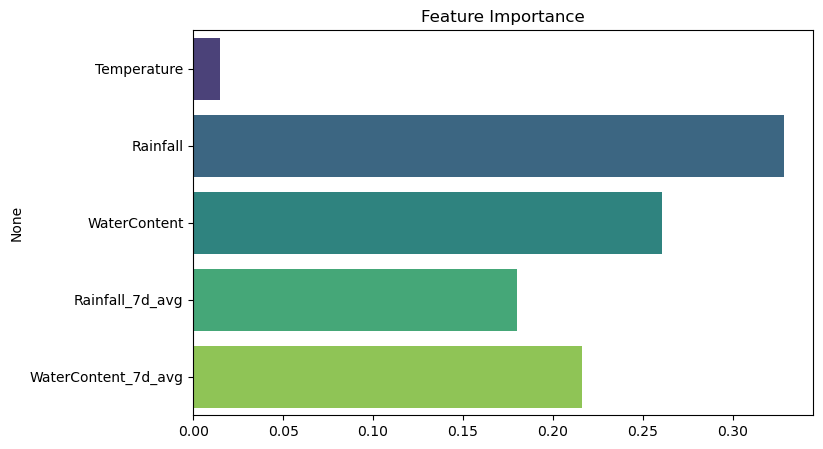

In [20]:
# 9. Feature Importance Chart

importances = model.feature_importances_
feat_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feat_names, palette="viridis")
plt.title("Feature Importance")
plt.show()

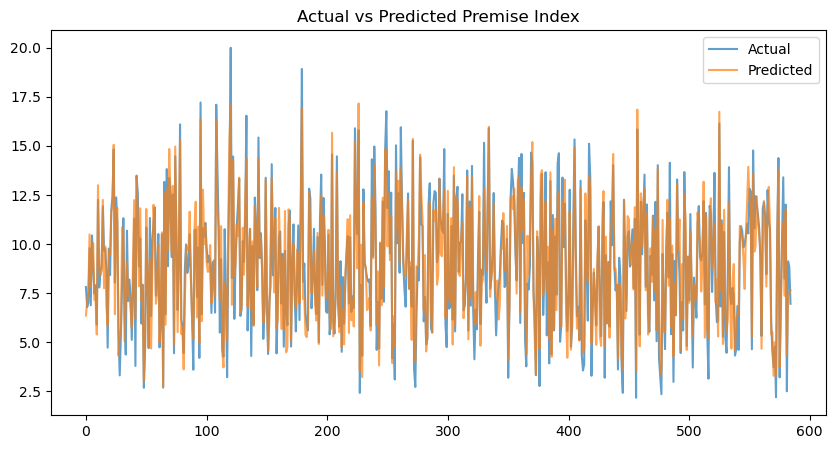

In [21]:
# 10. Chart: Actual vs Predicted Difference

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", alpha=0.7)
plt.plot(y_pred, label="Predicted", alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Premise Index")
plt.show()

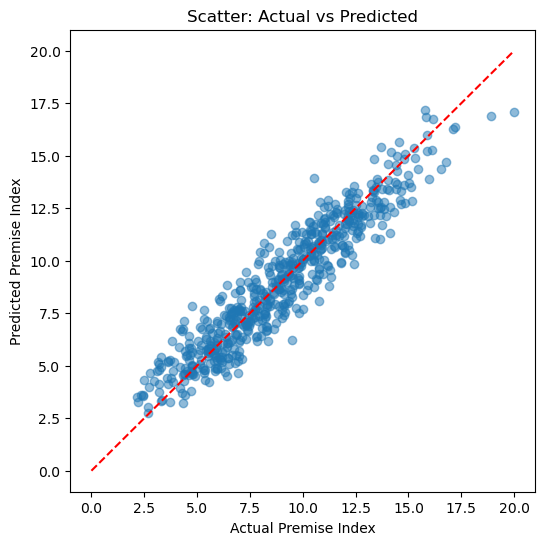

In [26]:
# 11. Scatter Plot: Actual vs Predicted

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Premise Index")
plt.ylabel("Predicted Premise Index")
plt.title("Scatter: Actual vs Predicted")
plt.plot([0,20],[0,20], color="red", linestyle="--")  # perfect prediction line
plt.show()

In [23]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [25]:
import pickle
import numpy as np

# Example sensor inputs (you can change these values)
temperature = 29.5      # in °C
rainfall = 15.2         # in mm
water_content = 62.0    # in %

# Rolling averages (you can supply your last 7-day averages or approximate)
rainfall_7d_avg = 18.0
watercontent_7d_avg = 65.0

# Combine into numpy array in the same order as training
sample_input = np.array([[temperature, rainfall, water_content, 
                          rainfall_7d_avg, watercontent_7d_avg]])

# Load the saved model
with open("random_forest_regression_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Make prediction
prediction = loaded_model.predict(sample_input)

print("Predicted Premise Index (%):", round(prediction[0], 2))

Predicted Premise Index (%): 10.76


C:\Users\KavinduRajapaksha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
